In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_curve,auc
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

# 군집분석

## (1) 데이터 구성하기 

In [7]:
df_raw=pd.read_csv("/Users/lee/Week3/직무능력평가.csv",engine="python",encoding='cp949')
df_raw.head(5)

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


## (2) 데이터 전처리 (scaling) 

In [18]:
scaler= StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)
df_raw_scaled[:5]

df_raw_y=df_raw_scaled[:,0]
df_raw_x=df_raw_scaled[:,1::]

## (3) Dendrogram

Text(0, 0.5, 'Sample index')

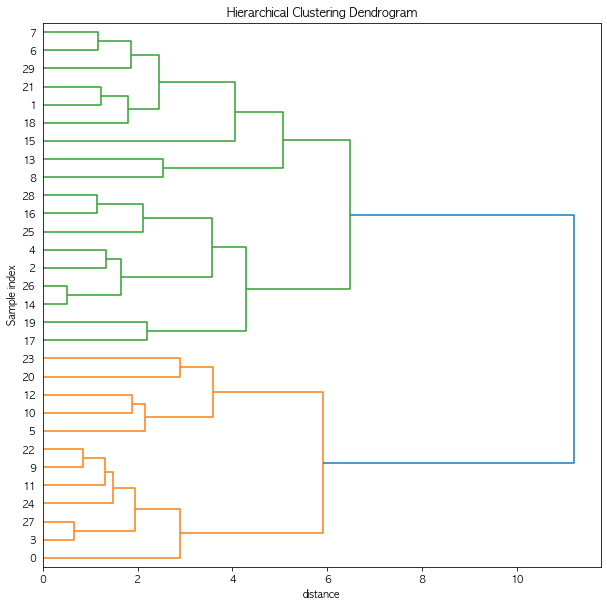

In [19]:
Z_ward = linkage(df_raw_x,method='ward',metric='euclidean')
Z_average = linkage(df_raw_x,method='average',metric='euclidean')
Z_Minkowski=linkage(df_raw_x,method='average',metric='minkowski')

#덴드로 그램(연결:ward,거리계산:euclidean
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
dendrogram(Z_ward,leaf_font_size=10,orientation="right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('distance');plt.ylabel('Sample index')

Text(0, 0.5, 'Sample index')

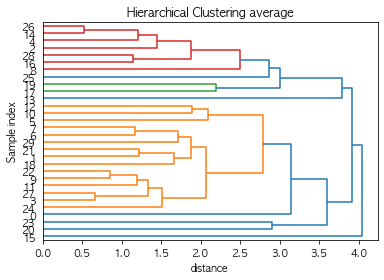

In [20]:
dendrogram(Z_average,leaf_font_size=10,orientation="right")
plt.title("Hierarchical Clustering average")
plt.xlabel('distance');plt.ylabel('Sample index')

Text(0, 0.5, 'Sample index')

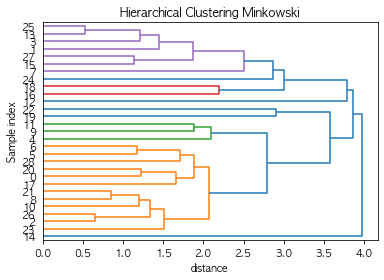

In [14]:
dendrogram(Z_Minkowski,leaf_font_size=10,orientation="right")
plt.title("Hierarchical Clustering Minkowski")
plt.xlabel('distance');plt.ylabel('Sample index')

## (4) 계층형 군집 생성

In [21]:
cluster_hierarchical = fcluster(Z=Z_ward,t=5,criterion='distance')
df_raw["ClusterHierarchical"]=cluster_hierarchical
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical
0,43,51,30,39,61,92,45,1
1,63,64,51,54,63,73,47,5
2,71,70,68,69,76,86,48,3
3,61,63,45,47,54,84,35,1
4,81,78,56,66,71,83,47,3


## (5) 군집별 데이터 요약

In [ ]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["min","mean","max"])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns=level0 + "_" + level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

## (6) K-평균 군집분석 : 군집 개수 찾기

In [29]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error=[]
for v_n_clus in cluster_range:
    clus=KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)
ds_error=pd.DataFrame({"NumberofCluster":cluster_range,"Error":clus_error})
ds_error

,NumberofCluster,Error
0,1,180.000000
1,2,114.082503
2,3,93.353633
3,4,79.362122
4,5,66.651824
5,6,56.632065
6,7,52.337694
7,8,43.658440
8,9,39.038004
9,10,32.345430


## (7) K-평균 군집분석 : 중심점까지 거리 제곱합ㅡ 시각화

Text(0, 0.5, ' Sum of squared distance')

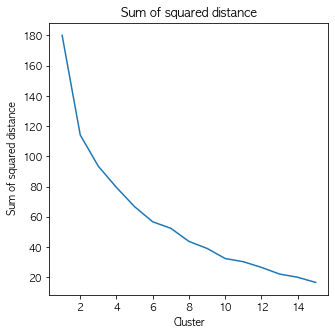

In [31]:
plt.figure(figsize=(5,5))
plt.plot(ds_error["NumberofCluster"],ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Cluster")
plt.ylabel(" Sum of squared distance")

## (8) K-평균 군집 번호 생성

In [32]:
clus=KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans=[i+1 for i in clus.labels_]
df_raw["ClusterKmeans"]=cluster_kmeans
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,2
2,71,70,68,69,76,86,48,3,3
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,3


## (9) K-평균 군집별 데이터 요약

In [35]:
ds_summary_km=df_raw.drop("ClusterHierarchical",axis=1,inplace=False).groupby("ClusterKmeans").agg(["min","mean","max"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns=level0+"_"+level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
1,2,43,58.545,67,51,60.455,70,30,47.455,68,...,62,51,62.182,75,73,80.364,92,33,41.455,52
2,3,65,74.625,85,60,75.875,85,54,62.750,71,...,75,55,75.625,88,74,79.125,86,46,55.000,72
3,4,40,50.500,69,37,48.500,62,33,45.250,57,...,58,43,50.500,55,49,58.250,64,25,35.250,49
4,5,58,71.200,82,53,73.400,90,39,46.800,53,...,72,58,63.600,70,54,66.600,78,34,37.000,41


## (10) DBSCAN 군집분석

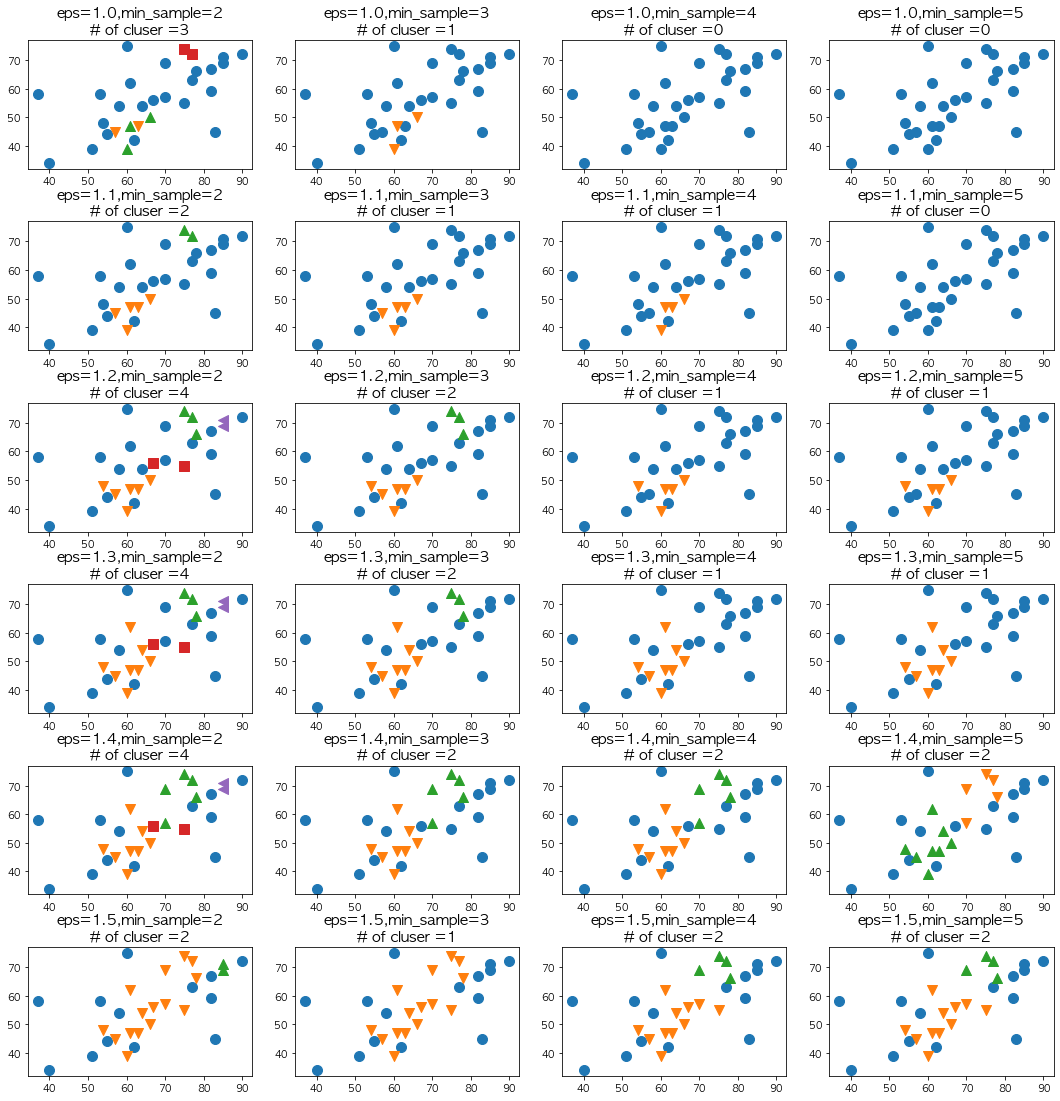

In [39]:
X=df_raw["DISSATIS"]
Y=df_raw["CHANCE"]
markers=["o","v","^","s","<",">","p","D"]
para_eps=[k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]
fig,axes = plt.subplots(len(para_eps),len(para_min_sample),figsize=(15,15))
fig.tight_layout(w_pad=1,h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan=DBSCAN(min_samples=min_sample,eps=eps)
        clusters=dbscan.fit_predict(df_raw_x)
        clusters=clusters + 1
        for (n_clus,clus)in enumerate(range(min(clusters),max(clusters)+1,1)):
            axes[i,j].scatter(X[clusters==clus],Y[clusters==clus],marker=markers[n_clus],s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample="+str(min_sample)+"\n# of cluser ="+str(max(clusters)),fontsize=15)

In [41]:
dbscan = DBSCAN(eps=1.4,min_samples=2).fit(df_raw_x)
cluster_dbscan=dbscan.labels_

for(i,val) in enumerate(cluster_dbscan):
    if val < 0 :
        cluster_dbscan[i]=0
    else:
        cluster_dbscan[i]=cluster_dbscan[i]+1
df_raw["ClusterDBScan"]=cluster_dbscan
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,43,51,30,39,61,92,45,1,2,0
1,63,64,51,54,63,73,47,5,2,1
2,71,70,68,69,76,86,48,3,3,2
3,61,63,45,47,54,84,35,1,2,1
4,81,78,56,66,71,83,47,3,3,2
